<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/Assignments/M4_AST_04_DistributedComputing_TensorFlow_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 4: Distributed Computing using TensorFlow

## Learning Objectives

At the end of the experiment, you will be able to:

* understand basics of TensorFlow and its components
* understand Data parallelism and multiprocessing
* create a computational and default graph in TensorFlow to be computed on different processes
* create a cluster and implement the server

## Information

#### Tensorflow in a nutshell

- TensorFlow was originally created by Google as an internal machine learning tool, but its implementation was open sourced under the Apache 2.0 License in November 2015.
- TensorFlow is an open-source end-to-end platform for creating Machine Learning applications.
- It is a symbolic math library that uses dataflow and differentiable programming to perform various tasks focused on training and inference of deep neural networks.
- It allows developers to create machine learning applications using various tools, libraries and community resources.

To know more about Tensorflow click  [here](https://towardsdatascience.com/a-beginner-introduction-to-tensorflow-part-1-6d139e038278)


### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M4_AST_04_DistributedComputing_TensorFlow_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")

Setup completed successfully


#### Importing required packages

In [4]:
# Importing Numpy package
import numpy as np
# Importing  pyplot module from matplotlib package
from matplotlib import pyplot as plt
# compat allows you to write code that works both in TensorFlow 1
import tensorflow.compat.v1 as tf

In [5]:
# Check the version of TensorFlow
tf.__version__

'2.17.0'

Now let us see how to define a tensor

In [6]:
# This will create an int32 tensor by default
IntTensor = tf.constant(8) # Creates a constant tensor from a tensor-like object.
# Displaying the value of IntTensor
print(IntTensor)

tf.Tensor(8, shape=(), dtype=int32)


To know more about tf.constant function click [here](https://docs.w3cub.com/tensorflow~python/tf/constant)

Now let us see how to define a **TensorFlow** variable. A TensorFlow variable maintains a shared, persistent state and can be manipulated by a program.

In [7]:
# Variables can be all kinds of types, just like tensors.
# We will create two variables of float type
# variable 1
a = tf.Variable(3.0, dtype=tf.float32)
# variable 2
b = tf.Variable(-3.0, dtype=tf.float32)
# Displaying the values of a and b variables
print(a, b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-3.0>


To know more about tf.Variable function click [here](https://docs.w3cub.com/tensorflow~python/tf/variable)

Now let us define a graph with a variable and perform below operations:
  - *variable* returns the current value of our variable
  - *initialize* assigns the initial value of 42 to that variable
  - *assign* assigns the new value of 13 to that variable

In [8]:
# A TensorFlow computation, represented as a dataflow graph.
# Creating the graph
graph = tf.Graph()
with graph.as_default():
    # Creating the variable which returns the current value of the variable
    variable = tf.Variable(42, name='number')
    # Initializing the value
    initialize = tf.global_variables_initializer()
    # asssigning new value
    assign = variable.assign(13)
# Printing the variable
print(variable)
# Printing the variable after assigning a new value to it
print(assign)

<tf.Variable 'number:0' shape=() dtype=int32>
<tf.Variable 'AssignVariableOp' shape=() dtype=int32>


To know more about tf.Graph function click [here](https://docs.w3cub.com/tensorflow~python/tf/graph)

**Note:** TensorFlow creates a default graph for you, so we don’t need the first two lines of the code above. The default graph is also what the sessions in the next section use when not manually specifying a graph.

#### Running Computations in a Session

To run any of the three defined operations, we need to create a session for that graph. The session will also allocate memory to store the current value of the variable.

In [9]:
# Create the session
with tf.Session(graph=graph) as sess:
    # Using the graph variables
    sess.run(initialize)
    sess.run(assign)
    # Displaying the result
    print(sess.run(variable))

13


The value of our variable is only valid within one session.

To know about tf.Session function click [here](https://docs.w3cub.com/tensorflow~python/tf/session)

**Note:** If we try to query the value afterwards in a second session, TensorFlow will <font color="red">raise an error</font> because the variable is not initialized there. Let us try this now

In [10]:
# Error: Attempting to use uninitialized value
# Using try-except block to catch the error
try:
    with tf.Session(graph=graph) as sess: # Creating a session 2
        # Trying to access the variable defined in session 1
        print(sess.run(variable))
except:
    print("This is an Error")


This is an Error


**Note:** we can use the graph in more than one session, we just have to initialize the variables again. The values in the new session will be completely independent from the first one:

In [11]:
# Creating a session 3
with tf.Session(graph=graph) as sess:
    # Initializing the graph variables
    sess.run(initialize)
    # Displaing the result
    print(sess.run(variable))

42


In [12]:
# Defining a matrix1 with all 2's
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)])
# Defining a matrix2 with all 1's
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)])
# Creating a session
with tf.Session() as sess:
    # Converting matrix i.e numpy array to tensor
    matrix1 = tf.constant(matrix1)
    # Converting matrix i.e numpy array to tensor
    matrix2 = tf.constant(matrix2)
    # Performing addition of two matrices
    result = sess.run(tf.add(matrix1,matrix2))
# Displaying the result
print(result)

[[3 3 3]
 [3 3 3]
 [3 3 3]]


### Distributed computing

TensorFlow supports distributed computing, allowing portions of the graph to be computed on different processes, which may be on completely different servers! In addition, this can be used to distribute computation to servers with powerful GPUs, and have other computations done on servers with more memory, and so on.

In [13]:
# Disable the eager execution
tf.disable_eager_execution() # This function can only be called before any Graphs, Ops, or Tensors have been created.

# creating a server
server = tf.train.Server.create_local_server() # Creates a new single-process cluster running on the local host.
# Create a session on the server
sess = tf.Session(server.target)
# Creating a tensor
c = tf.constant("Hello, distributed TensorFlow!")
# Running the code in the session
sess.run(c)

b'Hello, distributed TensorFlow!'

To know about click tf.train.Server.create_local_server function [here](https://docs1.w3cub.com/tensorflow~python/tf/train/server/create_local_server/)

TensorFlow works like a server-client model. The idea is to create a bunch of workers that will perform the heavy lifting. Then we create a session on one of those workers, and it will compute the graph, possibly distributing parts of it to other clusters on the server.

Now let us create a cluster using ClusterSpec function, to pass information to all workers. A ClusterSpec is built using a dictionary, where the key is a “job name”, and each job contains many workers.

In [14]:
# Cluster holding the no.of workers
# Represents a cluster as a set of "tasks", organized into "jobs".
cluster = tf.train.ClusterSpec({"ps": ["localhost:65062"], "local": ["localhost:65063","localhost:65064"]})

To know about tf.train.ClusterSpec function click [here](https://docs.w3cub.com/tensorflow~python/tf/train/clusterspec)

With Distributed TensorFlow, each process runs a special execution engine: a TensorFlow server. Servers are linked together as part of a cluster. (Each server in the cluster is also known as a task.)

Now let us create servers and graph one of the worker from cluster by specifying the task_index. where job name `ps` species the parameters setting and `local` are the other workers.

In [15]:
# task_index in each server is associated with the job
# Using try-except block to catch the errors
try:
    # Creating Server 1 with ps as its name
    server1 = tf.train.Server(cluster, job_name="ps", task_index=0)
    # Creating Server 2 with local as its name
    server2 = tf.train.Server(cluster, job_name="local", task_index=0)
    # Creating Server 3 with local as its name
    server3 = tf.train.Server(cluster, job_name="local", task_index=1)
except:
    # Displaying the message when the servers are already running
    print("Servers started already")

From the above code, we can say that with the servers linked together in the same cluster, we can now experience the main magic of Distributed TensorFlow: any variable with the same name will be shared between all servers.

Now let us create two constants a and b i.e tensors in server1

In [16]:
# server1
with tf.Session(server1.target) as sess: # Creating a session
    # Initializing the values
    a = tf.constant(3.0, dtype=tf.float32) # Tensor 1
    b = tf.constant(4.0)  # Tensor 2
    # Running the values on the session
    sess.run(a)

Now let us add up the two values that we have created in server1 and update them in server 2

In [17]:
# server2
with tf.Session(server2.target) as sess: # Creating a session
    # Initializing the global values in server2
    # init = tf.global_variables_initializer()
    # Adding the values a, b we have created in server 1
    add_node = tf.add(a,b)
    # Running the values on session
    # sess.run(init)
    # Displaying the result
    print(sess.run(add_node))

7.0


Now let us try to change the value of a in  server 3

In [18]:
# server3
with tf.Session(server3.target) as sess:
    # Initializing the global values in server3
    # init = tf.global_variables_initializer()
    # changing the value of global variable a
    a = tf.constant(9.0, dtype=tf.float32)
    # Adding the values a, b we have created in server 1
    add_node = tf.add(a,b)
    # Running the values on session
    # sess.run(init)
    # change the values of a
    a = add_node
    # Displaying the result
    print(sess.run(add_node))

13.0


Now let us check the variable values of a and b in each server, after performing operations on a and b in different servers

In [19]:
# server1 a and b values
with tf.Session(server1.target) as sess: # Creating a session
    print(sess.run(a)) # Prints value of variable a
    print(sess.run(b)) # Prints value of variable b
    print(sess.run(add_node))

13.0
4.0
13.0


In [20]:
# values of a and b in server2
with tf.Session(server2.target) as sess: # Creating a session
    print(sess.run(a)) # Prints value of variable a
    print(sess.run(b)) # Prints value of variable b
    print(sess.run(add_node))

13.0
4.0
13.0


### Map Reduce

Map Reduce is a popular paradigm for performing large operations. It is composed of two major steps Map, Reduce

In [21]:
# take this list of things, and apply this function to each of them

def myfunction(x):
    # adding the value with 5
    return x + 5
# Appyling myfunction on a list [1, 2, 3]
map_result = map(myfunction, [1, 2, 3])
# Displaying the result
print(list(map_result))

[6, 7, 8]


To know more about python map function click [here](https://docs.python.org/3/library/functions.html#map)

**reduce** means “take this list of things, and combine them using this function”. A common reduce operation is sum – i.e “take this list of numbers and combine them by adding them all up”, which can be performed by creating a function that adds two numbers. What reduce does is takes the first two values of the list, performs the function, takes the result, and then performs the function with the result and the next value. For sum, we add the first two numbers, take the result, add it with out next number, and so on until we hit the end of the list. Again, reduce is part of normal python (although it isn’t distributed):

In [22]:
from functools import reduce # Importing reduce function from the functools package
# Defining a function to add two values
def add(a, b):
    # returning the sum of two values
    return a + b
# Applying add function on the list [1, 2, 3] and finding the cumulative sum using reduce function
print(reduce(add, [1, 2, 3]))

6


To know more about python reduce function click [here](https://docs.python.org/3/library/functools.html#functools.reduce)

In Distributed TensorFlow, performing map and reduce operations is a key building block of many non-trivial programs. For example, an ensemble learning may send individual machine learning models to multiple workers, and then combine the classifications to form the final result.

In [23]:
# Disabling the eager execution function
tf.disable_eager_execution()

# Inserts a placeholder for a tensor that will be always fed.
x = tf.placeholder(tf.float32, 1000)
# Creating a session
with tf.Session() as sess:
    # Computes the mean of elements across dimensions of a tensor.
    result = sess.run(tf.reduce_mean(x), feed_dict={x: np.random.random(1000)})
    # Displaying the result
    print(result)

0.5136394


- To know more about tf.placeholder function click [here](https://docs.w3cub.com/tensorflow~python/tf/placeholder)
- To know more about tf.reduce_mean function click [here](https://docs.w3cub.com/tensorflow~python/tf/reduce_mean)
- To know more about map reduce click [here](https://towardsdatascience.com/a-mapreduce-overview-6f2d64d8d0e6)

### Linear Model using TensorFlow

We consider a simple equation y = 2 * x + 4

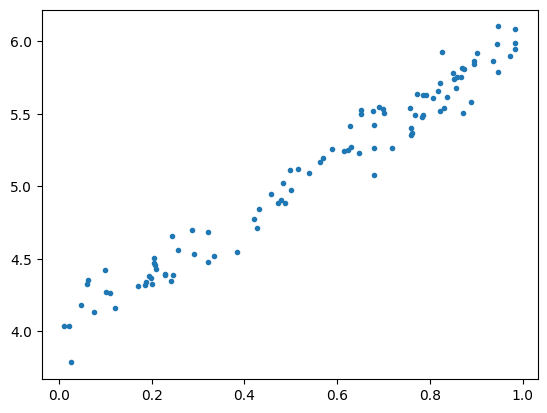

In [24]:
# creating an array
x_train = np.random.rand(100).astype(np.float32)

# noise is added to randomize the data
noise = np.random.normal(scale=0.1, size=len(x_train))
# applying the equation to store the ground truth
y_train = 2*x_train + 4 + noise

# plot the data
plt.plot(x_train, y_train, '.');

#### Placeholders

A placeholder is simply a variable that we will assign data to it later. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders.

Now let us define a placeholder to hold the values of weight and bias

In [25]:
# place holder for input to use in the model
x = tf.placeholder(tf.float64)

# Weight, bias are defined (assumed)
W = tf.placeholder(tf.float64)
b = tf.placeholder(tf.float64)
# Linear model
linear_model = W * x + b

#### Apply the linear model

Now let us create a session and apply the linear model

* Estimate coefficients using x_train and y_train

* Feed the data  to place holders defined in linear model

* Evaluate the model and get the predicted data

In [26]:
# Creating a session
with tf.Session() as sess:
    # Initialize the global variables
    sess.run(tf.global_variables_initializer())
    # Estimating the coefficients
    b1 = np.cov(x_train, y_train)[0][1] / np.var(x_train)
    b0 = np.mean(y_train) - b1 * np.mean(x_train)
    # evaluate the model to get predicted values
    y_pred = linear_model.eval(feed_dict={x: x_train, W:b1, b:b0})
    # Displaying the results
    print(y_pred)

[5.36188505 5.52348236 5.80463238 5.08400893 4.38212228 5.26872435
 5.65496331 5.64493486 5.55452924 5.18188186 5.29974346 5.14568628
 4.21343518 5.23486225 4.97928706 5.65677639 5.6724011  5.72530238
 4.8540227  5.57861301 5.68756556 4.11591482 5.52813108 4.01383287
 4.66959978 4.64047473 5.91111957 5.03489118 5.90320215 4.19366438
 5.81616764 5.75717556 5.62583156 4.36506771 5.36849371 5.57997588
 4.19797839 5.30876651 5.98164341 5.71334032 5.90734521 5.9837804
 5.53328038 5.7186872  5.75872356 4.95990406 4.96896575 5.52937474
 4.48587078 5.36773275 5.88612412 4.40620614 4.76668615 4.37104204
 4.08535865 5.44493675 5.75245329 5.96196888 4.39503472 5.73141927
 5.31142243 5.36864092 4.64031272 4.41429215 5.0057656  4.84169049
 4.33414947 5.26025272 5.98417217 5.66504972 4.4556053  5.80551495
 4.5787318  4.4101836  5.59598137 4.8658126  4.57334627 4.4810407
 5.13157021 4.51063623 4.94676669 5.58146458 4.49016749 4.45505822
 5.40776899 4.40726415 5.748174   5.78910054 5.41163972 5.254779

#### Plot the predicted line on the data

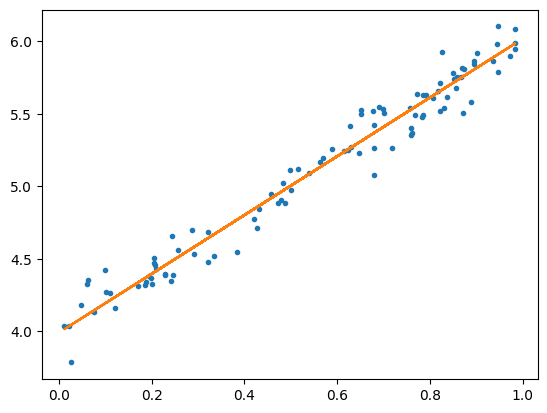

In [27]:
plt.plot(x_train, y_train, '.')
plt.plot(x_train, y_pred);

#### Calculate the loss

Now lets calculate the loss of linear model and execute using another session

In [28]:
# Subgraph to get a vector of sq. errs.
squared_deltas = tf.square(linear_model - y_train, name="sq_err")
# calculate the loss
loss = tf.reduce_sum(squared_deltas, name="sq_err_sum")
with tf.Session() as sess: # Creating a session 2
    # Initialize the global variables
    sess.run(tf.global_variables_initializer())
    # Calculating the loss
    los = sess.run(loss, {x:x_train, W:b1, b:b0})
    # Displaying the loss value
    print(los)

1.2734856255144165


To know more about the tf.reduce_sum click [here](https://docs.w3cub.com/tensorflow~python/tf/reduce_sum)

###Simple XOR Logic operation using a Neural Network

**Defining XOR Truth Table with input and output data:**

In [29]:
import numpy as np

# Defining input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data (4 samples, 2 features)
Y = np.array([[0], [1], [1], [0]])              # Output data (4 samples, 1 output)

**Define the Neural Network architecture:**

In [30]:
input_size = 2
hidden_size = 4
output_size = 1

* input_size: This variable basically represents the number of input features. In this example, it indicates the number of columns in the input data matrix X.

* hidden_size: This variable represents the number of neurons (or units) in the hidden layer of the neural network. In this particular implementation, we have 4 no. of neurons in the hidden layer. It determines the dimensionality of the hidden layer.

* output_size: This variable represents the number of output neurons in the neural network. In this example, it indicates there is one output neuron present in the output layer.
The no. of output neurons is typically determined by the number of classes in a classification task or the dimensionality of the output in a regression task.

These variables help us to define the size and structure of the neural network, allowing us to specify the number of input features, the size of the hidden layer, and the number of output neurons in a Neural Network.

**Initialize the weights and biases for the Neural Network:**

In [31]:
W1 = np.random.randn(input_size, hidden_size)  # Weights for input to hidden layer
b1 = np.zeros((1, hidden_size))                # Biases for hidden layer
W2 = np.random.randn(hidden_size, output_size) # Weights for hidden to output layer
b2 = np.zeros((1, output_size))                # Biases for output layer
print("W1:", W1)

W1: [[ 1.63926202  0.016526   -1.29493743 -1.05564617]
 [-0.48647852  1.34392442 -0.93612004 -1.49384387]]


-- **W1** represents the weight matrix connecting the input layer to the hidden layer. It has dimensions [input_size x hidden_size], where input_size is the number of input features and hidden_size is the number of neurons in the hidden layer. Each element **W1[i, j]** represents the weight of the connection from input neuron i to hidden neuron j.

-- **b1** is the bias vector for the hidden layer. It has dimensions [1 x hidden_size], where each element b1[0, j] represents the bias associated with hidden neuron j.

-- **W2** represents the weight matrix connecting the hidden layer to the output layer. It has dimensions [hidden_size x output_size], where hidden_size is the number of neurons in the hidden layer and output_size is the number of output neurons. Each element W2[i, j] represents the weight of the connection from hidden neuron i to output neuron j.

-- **b2** is the bias vector for the output layer. It has dimensions [1 x output_size], where each element b2[0, j] represents the bias associated with output neuron j.

**Define the activation function (sigmoid) used in the Neural Network:**

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

* **Sigmoid activation function:** In Neural Network, there are many activation functions in use. Here we are using the activation function 'sigmoid'. This function takes an input x and returns its sigmoid activation value, which is a real number between 0 and 1, representing the probability of a binary outcome in machine learning tasks like binary classification.

**Forward pass through the Neural Network:**

In [33]:
Z1 = np.dot(X, W1) + b1                        # Input to hidden layer
A1 = sigmoid(Z1)                               # Activation for hidden layer
Z2 = np.dot(A1, W2) + b2                       # Hidden to output layer
A2 = sigmoid(Z2)                               # Activation for output layer

**Compute the loss (Mean Squared Error):**

In [34]:
loss = np.mean((Y - A2)**2)

**Display the output:**

In [35]:
# Print output
print("Input:")
print(X)
print("\nPredicted Output:")
print(A2)
print("\nActual Output:")
print(Y)
print("\nLoss:", loss)

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Predicted Output:
[[0.49464251]
 [0.53613405]
 [0.54931569]
 [0.57986735]]

Actual Output:
[[0]
 [1]
 [1]
 [0]]

Loss: 0.24980132973557045


### Please answer the questions below to complete the experiment:




In [44]:
# @title A ClusterSpec is built using a dictionary, where the key is a { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "job name" #@param ["","node","cluster", "job name", "none of the above"]

In [45]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [46]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}

In [50]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [47]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [48]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [51]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4991
Date of submission:  28 Sep 2024
Time of submission:  22:45:14
View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions
